In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 314.1+ KB


In [4]:
len(df)

6698

In [5]:
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
6693,49,Female,PhD,Director of Marketing,20.0,200000
6694,32,Male,High School,Sales Associate,3.0,50000
6695,30,Female,Bachelor's Degree,Financial Manager,4.0,55000
6696,46,Male,Master's Degree,Marketing Manager,14.0,140000


In [6]:
df.isnull().count()

,0
Age,6698
Gender,6698
Education Level,6698
Job Title,6698
Years of Experience,6698
Salary,6698


In [7]:
df = df.rename(columns={'Education Level' : 'Education_Level', 'Job Title':'Job_Title', "Years of Experience":'Year_of_Experience'})


In [8]:
Top_5_Jobs = df['Job_Title'].value_counts().head()
Top_5_Jobs

,count
Job_Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318


In [9]:
#Data Cleaning Process, keeping uniformity in the data.
df['Education_Level'].replace({"Master's Degree": "Master's", "Bachelor's Degree": "Bachelor's", "phD":"PhD"},inplace=True)

<ipython-input-9-ed67870870f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_Level'].replace({"Master's Degree": "Master's", "Bachelor's Degree": "Bachelor's", "phD":"PhD"},inplace=True)


Software Engineer field has the highest number of jobs followed by Data Scientist, Software Engineer Manager, Data Analyst and Senior Project Engineer.

In [10]:
Top_5_Job_by_Salary = df.groupby('Job_Title')['Salary'].max().sort_values(ascending = False).head()
Top_5_Job_by_Salary

,Salary
Job_Title,
Chief Technology Officer,250000
CEO,250000
Financial Manager,250000
Data Scientist,240000
Marketing Manager,228000


These are the top 5 most salaried jobs out of which CTO, CEO, and Financial Manager earns the most.

**Age Distribution**

In [11]:
Avg_age = df.groupby('Job_Title')['Age'].mean().sort_values(ascending=False)
Avg_age

,Age
Job_Title,
Director,52.000000
Chief Technology Officer,52.000000
Director of Human Resources,51.000000
CEO,50.000000
Director of Sales and Marketing,50.000000
...,...
Data Entry Clerk,25.000000
Juniour HR Coordinator,24.333333
Delivery Driver,24.000000


In [12]:
Job_Title_by_Avg_Age_And_Education_level = df.groupby('Job_Title').agg({'Age':'mean', 'Education_Level': lambda x:x.value_counts().idxmax()}).sort_values('Age', ascending=False)
Job_Title_by_Avg_Age_And_Education_level

,Age,Education_Level
Job_Title,,
Director,52.000000,Master's
Chief Technology Officer,52.000000,PhD
Director of Human Resources,51.000000,PhD
CEO,50.000000,Bachelor's
Director of Sales and Marketing,50.000000,PhD
...,...,...
Data Entry Clerk,25.000000,Bachelor's
Juniour HR Coordinator,24.333333,High School
Delivery Driver,24.000000,High School


Salary Analysis

Salary Distribution ---
Examine the range and average salary. Use visualizations like histograms or boxplots to identify outliers.

In [13]:
Avg_Salary = df.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False)
Avg_Salary

,Salary
Job_Title,
Chief Technology Officer,250000.000000
CEO,250000.000000
Chief Data Officer,220000.000000
Director of Data Science,204561.403509
VP of Finance,200000.000000
...,...
Juniour HR Coordinator,32000.000000
Junior Sales Associate,28211.267606
Delivery Driver,28000.000000


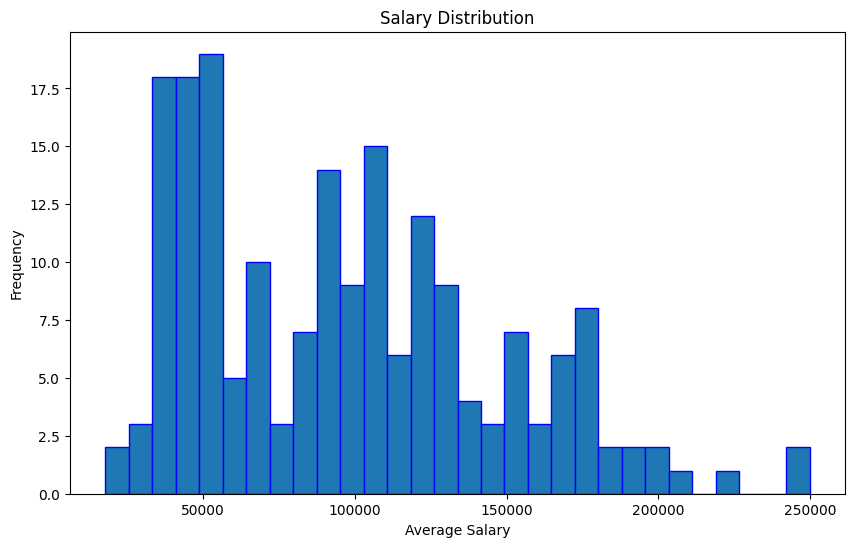

In [14]:
plt.figure(figsize=(10,6))
plt.hist(Avg_Salary, bins=30, edgecolor='blue')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

From the above chart is it clear that most of the people are earning in the range of 50000 and 250000 is the highest range of salary.

Salary Vs Gender

In [15]:
Job_Title_by_Gender = df.groupby('Job_Title').agg({'Salary': lambda x:round(x.mean(),2), 'Gender': lambda x:x.value_counts().idxmax()}).sort_values('Salary',ascending = False)
Job_Title_by_Gender

,Salary,Gender
Job_Title,,
Chief Technology Officer,250000.00,Male
CEO,250000.00,Male
Chief Data Officer,220000.00,Male
Director of Data Science,204561.40,Male
VP of Finance,200000.00,Male
...,...,...
Juniour HR Coordinator,32000.00,Female
Junior Sales Associate,28211.27,Male
Delivery Driver,28000.00,Male


In the top 10 highest paid jobs only 1 job is dominated by female. i.e. director of Human Resource.

Salary Vs Education

In [16]:
Job_Salary_and_Education = df.groupby('Job_Title').agg({'Salary': lambda x:round(x.mean(),2),'Education_Level': lambda x:x.value_counts().idxmax() if not x.isnull().all() else 'N/A'}).sort_values('Salary', ascending=False)
Job_Salary_and_Education

,Salary,Education_Level
Job_Title,,
Chief Technology Officer,250000.00,PhD
CEO,250000.00,Bachelor's
Chief Data Officer,220000.00,PhD
Director of Data Science,204561.40,PhD
VP of Finance,200000.00,Master's
...,...,...
Juniour HR Coordinator,32000.00,High School
Junior Sales Associate,28211.27,High School
Delivery Driver,28000.00,High School


Salary vs. Experience

In [17]:
Experiencewise_Job_Title = df.groupby('Job_Title').agg({'Salary' : lambda x:round(x.mean(),2), 'Year_of_Experience': lambda x:round(x.mean(),2)}).sort_values('Year_of_Experience', ascending=False)
Experiencewise_Job_Title

,Salary,Year_of_Experience
Job_Title,,
CEO,250000.0,25.0
Chief Technology Officer,250000.0,24.0
Supply Chain Analyst,130000.0,22.0
Director of Sales and Marketing,180000.0,22.0
Director of Human Resources,187500.0,22.0
...,...,...
Junior Developer,40000.0,1.0
Delivery Driver,28000.0,0.0
Receptionist,25000.0,0.0


Job Title Distribution

In [18]:
most_jobs= df['Job_Title'].value_counts()
most_jobs

,count
Job_Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


Experience Distribution

In [19]:
min = df['Year_of_Experience'].min()
max = df['Year_of_Experience'].max()
mean = df['Year_of_Experience'].mean()
range = max - min
median = df['Year_of_Experience'].median()
mode = df['Year_of_Experience'].mode()
print ('mean experience -', mean)
print ('median experience -', median)
print( 'minimum experience -', min)
print ('maximum experinece -',max)
print ('experience range -', range)
print('median -', median)
print('mode -', mode)

mean experience - 8.095177664974619
median experience - 7.0
minimum experience - 0.0
maximum experinece - 34.0
experience range - 34.0
median - 7.0
mode - 0    2.0
Name: Year_of_Experience, dtype: float64


In [20]:
Education_with_Gender=df.groupby('Education_Level')['Gender'].value_counts()
Education_with_Gender

Education_Level  Gender
Bachelor's       Male      1823
                 Female    1198
High School      Female     251
                 Male       185
                 Other       12
Master's         Female    1068
                 Male       790
                 Other        2
PhD              Male       873
                 Female     496
Name: count, dtype: int64

1. From the above analysis it is clear that Females are ahead in Master's and High School degree where as Males are ahead in doing Bachelor's and PhD.
2. CEO is the leading job according to Salary and Experience although it has bachelors degree.